### User Interface:

Import important libraries:

In [1]:
import mysql.connector
import getpass
import ipywidgets as widgets
import random, string
from datetime import datetime, timedelta

Register new user:

In [2]:
#register new user
conn = mysql.connector.connect(user='root', password='password',host='127.0.0.1',database='theatre')
fullname = widgets.Text(placeholder='Enter name',description='Full Name:')
email = widgets.Text(placeholder='Enter Email',description='Email:')
phn = widgets.Text(placeholder='Enter Phone Number',description='Phone No:')
addrs = widgets.Text(placeholder='Enter Address',description='Address:')
gender_radio = widgets.RadioButtons(options=['MALE','FEMALE'],layout={'width': 'max-content'},description='Gender:')



button = widgets.Button(description="Submit")
output = widgets.Output()


def on_button_clicked(b):
    with output:
        output.clear_output()
        u_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        query_insertreview = ('insert into user values("{uid}","{fname}","{em}","{ph}","{addr}","{gender},{role}");'.format(
        uid = u_id,
        fname = fullname.value,
        ph = phn.value,
        addr = addrs.value,
        gender = gender_radio.value,
        role = 'USER'
        ))

        with conn.cursor() as cursor:
            cursor.execute(query_insertreview)
            cursor.execute('commit;')
            print('User Registered with ID',u_id)

button.on_click(on_button_clicked)


display(fullname,email,phn,addrs,gender_radio,button,output)


Text(value='', description='Full Name:', placeholder='Enter name')

Text(value='', description='Email:', placeholder='Enter Email')

Text(value='', description='Phone No:', placeholder='Enter Phone Number')

Text(value='', description='Address:', placeholder='Enter Address')

RadioButtons(description='Gender:', layout=Layout(width='max-content'), options=('MALE', 'FEMALE'), value='MAL…

Button(description='Submit', style=ButtonStyle())

Output()

Login to the the system(User or admin):

In [3]:
Username = widgets.Text(placeholder='Type username',description='Username:')

Password = widgets.Password(placeholder='Enter password',description='Password:')

user_id = ''

button = widgets.Button(description="Connect!")
output = widgets.Output()
display(Username, Password, button, output)
conn = mysql.connector.connect()
def on_button_clicked(b):
    global user_id 
    rootconn = mysql.connector.connect(user='root', password='password',host='127.0.0.1',database='theatre')
    print("initial")
    print(rootconn)
    with output:
        with rootconn.cursor() as cursor:
            global conn
            query = 'select * from user where email = "{username}" and phone_number like "%{password}";'
            cursor.execute(query.format(username = Username.value,password = Password.value))
            res = cursor.fetchall()
            for i in res:
                print(i)
                user_id = i[0]
                print('Welcome User: {name}'.format(name = i[1]))
                if(i[6] == 'USER'):
                    conn = mysql.connector.connect(user='root', password='password',host='127.0.0.1',database='theatre')
                else:
                    conn = rootconn
        print('Status: Logged In')
        print(conn)

button.on_click(on_button_clicked)

# hoc081098@gmail.com
# 135



Text(value='', description='Username:', placeholder='Type username')

Password(description='Password:', placeholder='Enter password')

Button(description='Connect!', style=ButtonStyle())

Output()

initial


User selects a movie:

In [4]:
movielist = list()
button = widgets.Button(description="Select")
output = widgets.Output()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmovie = widgets.Dropdown(options=movielist,description='Select Movie:')

query_moviegenre = 'select name from genre where genre_id in(select genre_id from movie_genre inner join movie on movie.movie_id = movie_genre.movie_id where movie.movie_id = "{movieid}");'
query_movieactor = 'select full_name from movie inner join movie_actor on movie_actor.movie_id = movie.movie_id inner join movie_cast on movie_cast.cast_id = movie_actor.actor_id  where movie.movie_id = "{movieid}";'
query_moviedirector = 'select full_name from movie inner join movie_director on movie_director.movie_id = movie.movie_id inner join movie_cast on movie_cast.cast_id = movie_director.director_id  where movie.movie_id = "{movieid}";'
query_movie = 'select * from movie where movie_id = "{movieid}";'

def on_button_clicked(b):
    with output:
        with conn.cursor() as cursor:
            genrelist = list()
            actorlist = list()
            directorlist = list()
            
            cursor.execute(query_movie.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Movie details:')
            for i in res:
                print('Description:')
                print(i[2])
                print('Duration:',end=" ")
                print(i[3])
                print('Release Date:',end=" ")
                print(i[4])
                print('Release Language:',end=" ")
                print(i[5])
                
                
            cursor.execute(query_moviegenre.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Genre:',end=" ")
            for i in res:      
                genrelist.append(i[0])
            genres = ', '.join(genrelist)
            print(genres)
            
            cursor.execute(query_moviedirector.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Directed By:',end=" ")
            for i in res:      
                directorlist.append(i[0])
            directors = ', '.join(directorlist)
            print(directors)
            
            cursor.execute(query_movieactor.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Cast:',end=" ")
            for i in res:      
                actorlist.append(i[0])
            actors = ', '.join(actorlist)
            print(actors)
                
button.on_click(on_button_clicked)

display(selectmovie,button,output)




Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Button(description='Select', style=ButtonStyle())

Output()

Select Theatre and then select a showtime for the selected movie:

In [5]:
theatrelist = list()
showlist = list()

button = widgets.Button(description="Select")
output = widgets.Output()

showquery = 'select showtime_id, theatre.theatre_id, theatre.theatre_name,theatre_name,start_time,end_time from showtime inner join movie on showtime.movie_id = movie.movie_id inner join theatre on showtime.theatre_id = theatre.theatre_id where movie.movie_id = "{movieid}" group by start_time,end_time;'

with conn.cursor() as cursor:
    cursor.execute(showquery.format(movieid = selectmovie.value))
    res = cursor.fetchall()
    for i in res:
        st = str(i[2])#+' Time:'+str(i[1]) + ' to ' + str(i[2])
        tup = (st,i[1])
        theatrelist.append(tup)
        theatreset=set(theatrelist)
        
theatreradio = widgets.RadioButtons(options=theatreset,layout={'width': 'max-content'},description='Theatres:')

showtimeradio = widgets.RadioButtons()

def on_button_clicked(b):
    with output:
        global showtimeradio
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute(showquery.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            st = ''
            showlist = list()
            for i in res:
                if (i[1] == theatreradio.value):
                    st = str(i[4]) + ' - ' + str(i[5])
                    tup = (st,i[0])
                    showlist.append(tup)
                    showset=set(showlist)
        showtimeradio = widgets.RadioButtons(options=showset,layout={'width': 'max-content'},description='Shows:')        
        display(showtimeradio)
        
        
button.on_click(on_button_clicked)

display(theatreradio,button,output)


RadioButtons(description='Theatres:', layout=Layout(width='max-content'), options=(('Lotte Cinema Đà Nẵng', '5…

Button(description='Select', style=ButtonStyle())

Output()

Select Seats: (shows only unbooked seats)

In [6]:
#book seat
#select seat

seattoggles = widgets.SelectMultiple()

rowlist = list()


query_emptyseats = 'select seats.seat_id,room,row_,column_,ticket_id from seats inner join ticket on ticket.seat_id = seats.seat_id where showtime_id = "{showtimeid}" and booking_id is null;'

with conn.cursor() as cursor:
    cursor.execute(query_emptyseats.format(showtimeid = showtimeradio.value))
    res = cursor.fetchall()
    for i in res:
        st = str(i[2]) + ' - ' + str(i[3])
        st_ids = (i[0],i[4])
        tup = (st,st_ids)
        rowlist.append(tup)
seattoggles = widgets.SelectMultiple(options=rowlist,description='Select Seat:',layout=widgets.Layout(width='70%', height='200px'))
            


display(seattoggles)

#4 seats only

SelectMultiple(description='Select Seat:', layout=Layout(height='200px', width='70%'), options=(('A - 1', ('5f…

Applying discount on basis of credit points:

In [7]:
#generate booking id

#generate bill
actbill_query = 'select sum(price)/1000 from ticket where ticket_id in {tickets};'
disc_bill = "select calc_discount('{userid}',{amt});"
#amount = int()

tickets = list()
seat = iter(seattoggles.value)
length = len(seattoggles.value)
for t in range(4):
    if(t < length):
        tickets.append(next(seat)[1])
    else:
        tickets.append("")
    tick_ids = tuple(tickets)

# for t in seattoggles.value:
#     tickets.append(t[1])
# tick_ids = tuple(tickets)

with conn.cursor() as cursor:
    cursor.execute(actbill_query.format(tickets = tick_ids))
    res = cursor.fetchall()
    for i in res:
        print('Charges: ',int(i[0]))
        amount = int(i[0])        
    cursor.execute(disc_bill.format(userid = user_id,amt = amount))
    #cursor.execute('select @n;')
    res = cursor.fetchall()
    for i in res:
        print('Payable after applying credit score: ',i[0])
        amount = int(i[0])

#20percent discount to users with 5 old bookings    
#take payment
#payment complete
#insert payment id to payment table and booking table
#insert booking id to booking table and ticket table
#print(user_id)
#seattoggles.value

Charges:  140
Payable after applying credit score:  131


Generate new Booking and payment IDs:

In [8]:
booking_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
paymentid = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
print("Booking ID: ",booking_id)
print("Payment ID: ",paymentid)

Booking ID:  1IU0mY7tP1EhslUt
Payment ID:  wwWoA4TVkomu87MM


Make payment by adding card number:

In [10]:
# enter card number
cardno = widgets.Text(placeholder='Enter Card Number',description=' Enter Card:')
button = widgets.Button(description="Book tickets")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        query_makebooking = ('call make_bookings("{bid}","{uid}","{shtid}","{pid}","{tid1}","{tid2}","{tid3}","{tid4}","{cn}","{tp}");'.format(
        bid = booking_id,
        uid = user_id,
        shtid = showtimeradio.value,
        pid = paymentid,
        tid1 = tick_ids[0],
        tid2 = tick_ids[1],
        tid3 = tick_ids[2],
        tid4 = tick_ids[3],
        cn = cardno.value,
        tp =  amount
        ))

        with conn.cursor() as cursor:
            #print(query_makebooking)
            cursor.execute(query_makebooking)
            cursor.execute('commit;')
            print('Booking Successfull')

button.on_click(on_button_clicked)

display(cardno,button,output)


Text(value='', description=' Enter Card:', placeholder='Enter Card Number')

Button(description='Book tickets', style=ButtonStyle())

Output()

Print tickets for customer:

In [11]:
from pandas import DataFrame
print("Tickets:")
query_viewtickets = "select * from ticket_information where Booking_Confirmation_No = '{bookingid}';"
with conn.cursor() as cursor:
    cursor.execute(query_viewtickets.format(bookingid = booking_id))
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)
    


Tickets:


,Movie,Audi,Row,Seat,Theatre,Location,Contact Number(Theatre),Booking_Confirmation_No,Form (time),To
0,The Man Standing Next,2D 4,A,3,Galaxy - Đà Nẵng,"Tầng 3, TTTM Coop Mart, 478 Điện Biên Phủ, Quậ...",02363739888,1IU0mY7tP1EhslUt,2020-10-18 02:00:00,2020-10-18 03:54:00
1,The Man Standing Next,2D 4,A,4,Galaxy - Đà Nẵng,"Tầng 3, TTTM Coop Mart, 478 Điện Biên Phủ, Quậ...",02363739888,1IU0mY7tP1EhslUt,2020-10-18 02:00:00,2020-10-18 03:54:00


Print bill for customer:

In [12]:
from pandas import DataFrame
print("Bill:")
query_viewbill = "select * from user_bill where Bill_Number = '{payid}';"
with conn.cursor() as cursor:
    cursor.execute(query_viewbill.format(payid = paymentid))
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)
    


Bill:


,Bill_Number,Movie,Theatre,Theatre Contact Number,Payee,User Email,Amount Paid
0,wwWoA4TVkomu87MM,The Man Standing Next,Galaxy - Đà Nẵng,02363739888,Petrus Hoc,hoc081098@gmail.com,131


Record user`s review for a movie:

In [13]:
#user rates a movie
movielist = list()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmovietorev = widgets.Dropdown(options=movielist,description='Select Movie:')

write_review = widgets.Textarea(placeholder='Type a review',description='Comments:')

review_radio = widgets.RadioButtons(options=[1,2,3,4,5],layout={'width': 'max-content'},description='Rating:')

button = widgets.Button(description="Submit")
output = widgets.Output()


def on_button_clicked(b):
    with output:
        output.clear_output()
        rating_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        query_insertreview = ('insert into rating values("{rid}","{uid}","{mid}","{rev}","{revstar}");'.format(

        rid = rating_id,
        uid = user_id,
        mid = selectmovietorev.value,
        rev = write_review.value,
        revstar = review_radio.value
        ))

        with conn.cursor() as cursor:
            cursor.execute(query_insertreview)
            cursor.execute('commit;')
            print('Review Recorded with ID',rating_id)

button.on_click(on_button_clicked)


display(selectmovietorev,write_review,review_radio,button,output)


Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Textarea(value='', description='Comments:', placeholder='Type a review')

RadioButtons(description='Rating:', layout=Layout(width='max-content'), options=(1, 2, 3, 4, 5), value=1)

Button(description='Submit', style=ButtonStyle())

Output()

### Admin interface

insert new movie and create a show in given theatres:

In [14]:
#insert new movie and create a show in given theatres

newmovie_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))

Title = widgets.Text(placeholder='Enter Title',description='Title:')
Overview = widgets.Text(placeholder='Enter Overview',description='Overview:')
Duration = widgets.Text(placeholder='Enter Duration in Hrs',description='Duration:')
Release_date = widgets.Text(placeholder='Enter Release Date',description='Release_date:')
original_language = widgets.Text(placeholder='Enter Original Language',description='Original Language:')
age_type = widgets.Text(placeholder='Enter Age Type',description='Age type:')

genrelist = list()
with conn.cursor() as cursor:
    cursor.execute('select name,genre_id from genre;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        genrelist.append(tup)

genremsel = widgets.SelectMultiple(options=genrelist,description='Select Genres (Max2):',layout=widgets.Layout(width='70%', height='200px'))


Director = widgets.Text(placeholder='Enter Director',description='Director:')
Actor = widgets.Text(placeholder='Enter Actor',description='Actor:')


button = widgets.Button(description="Submit")
output = widgets.Output()


def on_button_clicked(b):
    with output:
        output.clear_output()
        genres = list()
        gen = iter(genremsel.value)
        length = len(genremsel.value)
        for t in range(2):
            if(t < length):
                genres.append(next(gen))
            else:
                genres.append("")
        genreids = tuple(genres)
    
        print(genreids)

        newdir_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        newact_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))

        query_insertmovie = ('call new_movie("{mid}","{mtitle}","{mov}","{mduration}","{releaseD}","{orlang}","{agetype}","{g1}","{g2}","{actid}","{actn}","{dctid}","{dctn}");'.format(
            
        mid = newmovie_id,
        mtitle = Title.value,
        mov = Overview.value,
        mduration = Duration.value,
        releaseD = Release_date.value,
        orlang = original_language.value,
        agetype = age_type.value,
        g1 = genreids[0],
        g2 = genreids[1],
        actid = newact_id,
        actn = Actor.value,
        dctid = newdir_id,
        dctn = Director.value
        ))
        
        print(query_insertmovie)

        with conn.cursor() as cursor:
            #cursor.execute(query_insertmovie)
            #cursor.execute('commit;')
            print('Movie inserted with ID: ',newmovie_id)

button.on_click(on_button_clicked)


display(Title,Overview,Duration,Release_date,original_language,age_type,genremsel,Director,Actor,button,output)

#director  Woo Min-ho


Text(value='', description='Title:', placeholder='Enter Title')

Text(value='', description='Overview:', placeholder='Enter Overview')

Text(value='', description='Duration:', placeholder='Enter Duration in Hrs')

Text(value='', description='Release_date:', placeholder='Enter Release Date')

Text(value='', description='Original Language:', placeholder='Enter Original Language')

Text(value='', description='Age type:', placeholder='Enter Age Type')

SelectMultiple(description='Select Genres (Max2):', layout=Layout(height='200px', width='70%'), options=(('Act…

Text(value='', description='Director:', placeholder='Enter Director')

Text(value='', description='Actor:', placeholder='Enter Actor')

Button(description='Submit', style=ButtonStyle())

Output()

delete a movie and its shows:

In [15]:
#delete a movie and its shows

movielist = list()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmov = widgets.Dropdown(options=movielist,description='Select Movie:')
button = widgets.Button(description="Delete")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute('delete from movie where movie_id = "{mid}";'.format(mid = selectmov.value))
        print('Movie deleted.')
button.on_click(on_button_clicked)

display(selectmov,button,output)





Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Button(description='Delete', style=ButtonStyle())

Output()

Create new Show at a showtime for a selected theatre:

In [16]:
#create new show

newshowtime_id = ''.join(random.choices(string.ascii_letters + string.digits, k=16))

movielist = list()
theatrelist = list()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmov = widgets.Dropdown(options=movielist,description='Select Movie:')

with conn.cursor() as cursor:
    cursor.execute('select Theatre_name,theatre_id from theatre;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        theatrelist.append(tup)
selecttheatre = widgets.Dropdown(options=theatrelist,description='Select Theatre:')
ticp = widgets.Text(placeholder='Enter Price',description='Ticket Price:')
ticstr = widgets.Text(placeholder='Enter Ticket ID Prefix',description='Ticket ID:')

button = widgets.Button(description="Submit")
output = widgets.Output()
movie_duration = int()
roomlist = list()
selectroom = widgets.Dropdown()
starttime  = widgets.DatetimePicker()
def on_button_clicked(b):
    with output:
        global selectroom, roomlist,movie_duration,starttime
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute('select room from seats where Theatre_id = "{theatre}" group by room;'.format(theatre = selecttheatre.value))
            res = cursor.fetchall()
            for i in res:
                r = i[0]
                roomlist.append(r)
        selectroom = widgets.Dropdown(options=roomlist,description='Select Room:')
        display(selectroom)
        starttime  = widgets.DatetimePicker( description='Pick a Time',disabled=False)
        display(starttime)
        with conn.cursor() as cursor:
            cursor.execute('select Duration from movie where movie_id = "{movie}";'.format(movie = selectmov.value))
            res = cursor.fetchall()
            for i in res:
                movie_duration = int(i[0])
                
button.on_click(on_button_clicked)

display(selectmov,selecttheatre,ticp,ticstr,button,output)



Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Dropdown(description='Select Theatre:', options=(('Galaxy - Đà Nẵng', '5f68b34045ab693e24bd9d70'), ('Starlight…

Text(value='', description='Ticket Price:', placeholder='Enter Price')

Text(value='', description='Ticket ID:', placeholder='Enter Ticket ID Prefix')

Button(description='Submit', style=ButtonStyle())

Output()

In [18]:

start_time = starttime.value.isoformat()        
endtime = starttime.value + timedelta(minutes=movie_duration)
end_time = endtime.isoformat()
        
query_insertshow = ('call new_showtime("{shid}","{mid}","{theid}","{st}","{endt}","{selroom}",{tp},"{tickstr}");'.format(
            
    shid = newshowtime_id,
    mid = selectmov.value,
    theid = selecttheatre.value,
    st = start_time,
    endt = end_time,
    selroom = selectroom.value,
    tp = int(ticp.value),
    tickstr = ticstr.value
))
        
print(query_insertshow)

with conn.cursor() as cursor:
    cursor.execute(query_insertshow)
    cursor.execute('commit;')
    print('Show inserted with ID: ',newshowtime_id)


call new_showtime("7LfUEE7jHbniEE3t","5f684ec4e5f57c315cac404d","5f68b34045ab693e24bd9d70","2022-12-16T23:10:00-05:00","2022-12-17T01:04:00-05:00","2D 4",80,"73856add");
Show inserted with ID:  7LfUEE7jHbniEE3t


delete shows for a movie:

In [19]:
# delete shows for a movie
movielist = list()
button = widgets.Button(description="Select")
output = widgets.Output()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmovie = widgets.Dropdown(options=movielist,description='Select Movie:')

query_moviegenre = 'select name from genre where genre_id in(select genre_id from movie_genre inner join movie on movie.movie_id = movie_genre.movie_id where movie.movie_id = "{movieid}");'
query_movieactor = 'select full_name from movie inner join movie_actor on movie_actor.movie_id = movie.movie_id inner join movie_cast on movie_cast.cast_id = movie_actor.actor_id  where movie.movie_id = "{movieid}";'
query_moviedirector = 'select full_name from movie inner join movie_director on movie_director.movie_id = movie.movie_id inner join movie_cast on movie_cast.cast_id = movie_director.director_id  where movie.movie_id = "{movieid}";'
query_movie = 'select * from movie where movie_id = "{movieid}";'

def on_button_clicked(b):
    with output:
        with conn.cursor() as cursor:
            genrelist = list()
            actorlist = list()
            directorlist = list()
            
            cursor.execute(query_movie.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Movie details:')
            for i in res:
                print('Description:')
                print(i[2])
                print('Duration:',end=" ")
                print(i[3])
                print('Release Date:',end=" ")
                print(i[4])
                print('Release Language:',end=" ")
                print(i[5])
                
                
            cursor.execute(query_moviegenre.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Genre:',end=" ")
            for i in res:      
                genrelist.append(i[0])
            genres = ', '.join(genrelist)
            print(genres)
            
            cursor.execute(query_moviedirector.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Directed By:',end=" ")
            for i in res:      
                directorlist.append(i[0])
            directors = ', '.join(directorlist)
            print(directors)
            
            cursor.execute(query_movieactor.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            print('Cast:',end=" ")
            for i in res:      
                actorlist.append(i[0])
            actors = ', '.join(actorlist)
            print(actors)
                
button.on_click(on_button_clicked)

display(selectmovie,button,output)




Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Button(description='Select', style=ButtonStyle())

Output()

In [20]:
theatrelist = list()
showlist = list()

button = widgets.Button(description="Select")
output = widgets.Output()

showquery = 'select showtime_id, theatre.theatre_id, theatre.theatre_name,theatre_name,start_time,end_time from showtime inner join movie on showtime.movie_id = movie.movie_id inner join theatre on showtime.theatre_id = theatre.theatre_id where movie.movie_id = "{movieid}" group by start_time,end_time;'

with conn.cursor() as cursor:
    cursor.execute(showquery.format(movieid = selectmovie.value))
    res = cursor.fetchall()
    for i in res:
        st = str(i[2])#+' Time:'+str(i[1]) + ' to ' + str(i[2])
        tup = (st,i[1])
        theatrelist.append(tup)
        theatreset=set(theatrelist)
        
theatreradio = widgets.RadioButtons(options=theatreset,layout={'width': 'max-content'},description='Theatres:')

showtimeradio = widgets.RadioButtons()

def on_button_clicked(b):
    with output:
        global showtimeradio
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute(showquery.format(movieid = selectmovie.value))
            res = cursor.fetchall()
            st = ''
            showlist = list()
            for i in res:
                if (i[1] == theatreradio.value):
                    st = str(i[4]) + ' - ' + str(i[5])
                    tup = (st,i[0])
                    showlist.append(tup)
                    showset=set(showlist)
        showtimeradio = widgets.RadioButtons(options=showset,layout={'width': 'max-content'},description='Shows:')        
        display(showtimeradio)
        
        
button.on_click(on_button_clicked)

display(theatreradio,button,output)


RadioButtons(description='Theatres:', layout=Layout(width='max-content'), options=(('Lotte Cinema Đà Nẵng', '5…

Button(description='Select', style=ButtonStyle())

Output()

In [21]:
#cancel a show

#delete a movie and its shows

print('Deleting showtime_id: ',showtimeradio.value)
button = widgets.Button(description="Delete")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute('delete from ticket where Showtime_id = "{shid}";'.format(shid = showtimeradio.value))
            cursor.execute('delete from showtime where Showtime_id = "{sid}";'.format(sid = showtimeradio.value))
        print('Show deleted.')
button.on_click(on_button_clicked)

display(button,output)


Deleting showtime_id:  5f760e14b4e1ec097c158169


Button(description='Delete', style=ButtonStyle())

Output()

change the prices for a show (add numeric value with +/- sign ex: +10 or -5):

In [22]:
#change the prices for a show

print('Updating ticket Proces for showtime_id: ',showtimeradio.value)
button = widgets.Button(description="Update")
output = widgets.Output()
update = widgets.Text(placeholder='Enter Update Value',description='Update by:')

def on_button_clicked(b):
    with output:
        output.clear_output()
        with conn.cursor() as cursor:
            #cursor.execute('update ticket set price = price{upd} where showtime_id = "{shid}";'.format(shid = showtimeradio.value,upd = update.value))
            print('update ticket set price = price{upd} where showtime_id = "{shid}";'.format(shid = showtimeradio.value,upd = update.value))
            #cursor.execute('commit;')
        print('Show Updated.')
button.on_click(on_button_clicked)

display(update,button,output)


Updating ticket Proces for showtime_id:  5f760e14b4e1ec097c158169


Text(value='', description='Update by:', placeholder='Enter Update Value')

Button(description='Update', style=ButtonStyle())

Output()

See how much money a movie made:

In [25]:
# revenue for a movie
movielist = list()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmov = widgets.Dropdown(options=movielist,description='Select Movie:')
button = widgets.Button(description="Select")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute('select revenue_generated("{mid}") as Revenue;'.format(mid = selectmov.value))
            res = cursor.fetchall()
            for i in res:
                print('Total revenue generated from movie: {amt}$'.format(amt = i[0]))
            
button.on_click(on_button_clicked)

display(selectmov,button,output)


Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Button(description='Select', style=ButtonStyle())

Output()

occupancy ratio of a theatre for a given movie:

In [26]:
# occupancy ratio of a theatre for a given movie
movielist = list()
theatrelist = list()
with conn.cursor() as cursor:
    cursor.execute('select title,movie_id from movie;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        movielist.append(tup)
selectmov2 = widgets.Dropdown(options=movielist,description='Select Movie:')

with conn.cursor() as cursor:
    cursor.execute('select theatre_name,theatre_id from theatre;')
    res = cursor.fetchall()
    for i in res:
        tup = (i[0],i[1])
        theatrelist.append(tup)
selectth = widgets.Dropdown(options=theatrelist,description='Select Theatre:')


button = widgets.Button(description="Select")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        with conn.cursor() as cursor:
            cursor.execute('select ratio_booked_seats("{mid}","{thid}");'.format(mid = selectmov2.value,thid=selectth.value))
            res = cursor.fetchall()
            for i in res:
                print('Occupancy Ratio: {r}'.format(r = i[0]))
            
button.on_click(on_button_clicked)

display(selectmov2,selectth,button,output)


Dropdown(description='Select Movie:', options=(('The Man Standing Next', '5f684ec4e5f57c315cac404d'), ('The Ma…

Dropdown(description='Select Theatre:', options=(('Galaxy - Đà Nẵng', '5f68b34045ab693e24bd9d70'), ('Starlight…

Button(description='Select', style=ButtonStyle())

Output()

Some stats that the admin can view:

(1) Most popular genre as per number of bookings:

In [25]:
#some stats that the admin can view
from pandas import DataFrame
print("most popular genre as per number of bookings:")
query = "select g.name as Genre, count(t.Ticket_id) as Tickets_Sold from genre as g, booking as b, showtime as s, movie as m, movie_genre as mg, ticket as t where b.booking_id=t.Booking_id and s.Showtime_id=b.Showtime_id and s.Movie_id=m.Movie_id and m.Movie_id=mg.Movie_id and mg.Genre_id=g.Genre_id and s.Movie_id=m.Movie_id group by g.name order by tickets_sold desc;"
with conn.cursor() as cursor:
    cursor.execute(query)
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)


most popular genre as per number of bookings:


,Genre,Tickets_Sold
0,Drama,38
1,Documentary,29
2,Thriller,25
3,Action,20
4,Horror,13
5,Science Fiction,12
6,Crime,11
7,Romance,8
8,History,6
9,Comedy,5


most popular genre as per number of bookings


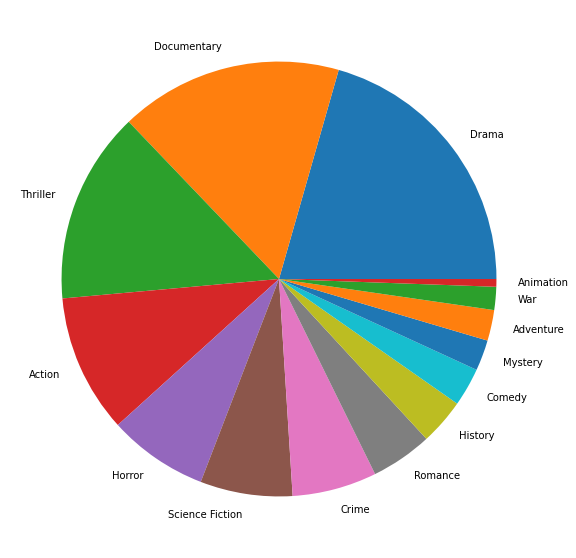

In [181]:
print('most popular genre as per number of bookings')
import matplotlib.pyplot as plt
y = list(df['Genre'])
x = list(df['Tickets_Sold'])
plt.figure(figsize=(10, 10))
plt.pie(x, labels = y)
plt.show()

(2) Revenue of given theatre for each date:

In [194]:

#some stats that the admin can view
from pandas import DataFrame
print("Revenue of given theatre for each date:")
query = "select sum(t.price) as Revenue_per_theatre, DATE(s.Start_time) as Date_, tt.Theatre_Name as Theatre from ticket as t, showtime as s, theatre as tt where s.Showtime_id=t.Showtime_id and tt.Theatre_id=s.Theatre_id group by s.Theatre_id, Date_;"
with conn.cursor() as cursor:
    cursor.execute(query)
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)


Revenue of given theatre for each date:


,Revenue_per_theatre,Date_,Theatre
0,56280000,2020-10-02,Galaxy - Đà Nẵng
1,66360000,2020-10-05,Galaxy - Đà Nẵng
2,81480000,2020-10-06,Galaxy - Đà Nẵng
3,42840000,2020-10-07,Galaxy - Đà Nẵng
4,47040000,2020-10-09,Galaxy - Đà Nẵng
...,...,...,...
175,52200000,2020-12-18,Starlight Đà Nẵng
176,47700000,2020-12-14,Lotte Cinema Đà Nẵng
177,4500000,2020-12-31,Galaxy - Đà Nẵng
178,7650,2022-12-16,Galaxy - Đà Nẵng


revenue for 10 days for Galaxy cinema:


<AxesSubplot:xlabel='Date_'>

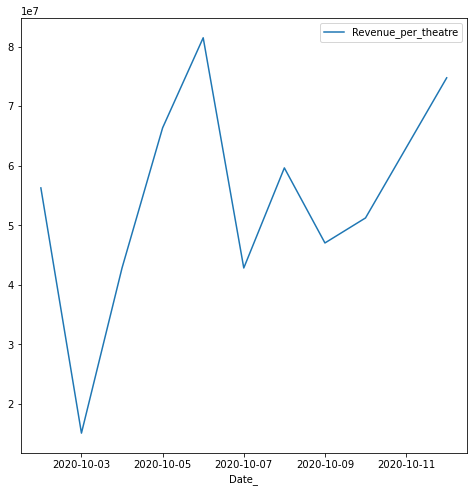

In [186]:
#for theatre galaxy
print('revenue for 10 days for Galaxy cinema:')
galaxydf = df[df['Theatre'] == 'Galaxy - Đà Nẵng']
galaxydf = galaxydf[['Revenue_per_theatre','Date_']]
galaxydf = galaxydf.iloc[:10]
galaxydf['Revenue_per_theatre']=galaxydf['Revenue_per_theatre'].astype(int)
galaxydf[['Revenue_per_theatre','Date_']].plot(x = 'Date_',y = 'Revenue_per_theatre',figsize = (8,8))


In [150]:
gdf = df[df['Theatre'] == 'Galaxy - Đà Nẵng']
gdf = gdf[['Revenue_per_theatre']]
grev = list(gdf['Revenue_per_theatre'])[0:10]
sdf = df[df['Theatre'] == 'Starlight Đà Nẵng']
sdf = sdf[['Revenue_per_theatre']]
srev = list(sdf['Revenue_per_theatre'])[0:10]
ldf = df[df['Theatre'] == 'Lotte Cinema Đà Nẵng']
ldf = ldf[['Revenue_per_theatre']]
lrev = list(ldf['Revenue_per_theatre'])[0:10]

Revenue for 10 days for 3 theaters:


<Figure size 432x288 with 0 Axes>

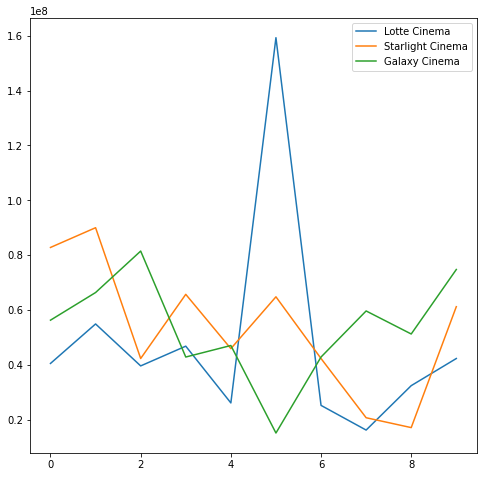

In [187]:
print("Revenue for 10 days for 3 theaters:")
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.figure(figsize=(8, 8))
plt.plot(lrev,label = "Lotte Cinema")
plt.plot(srev,label = "Starlight Cinema")
plt.plot(grev,label = "Galaxy Cinema")
plt.legend()
plt.show()

(3) Revenue per date:

In [196]:


#some stats that the admin can view
from pandas import DataFrame
print("Revenue per date:")
query = "select DATE(s.Start_time) as Date_, sum(t.price) as Revenue from ticket as t, showtime as s where s.Showtime_id=t.Showtime_id group by Date_ order by Date_;"
with conn.cursor() as cursor:
    cursor.execute(query)
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)


Revenue per date:


,Date_,Revenue
0,2020-10-02,127380000
1,2020-10-03,138420000
2,2020-10-04,158940000
3,2020-10-05,246360000
4,2020-10-06,162480000
...,...,...
61,2020-12-17,265620000
62,2020-12-18,267300000
63,2020-12-31,4500000
64,2022-12-12,6720


Total Revenue from ticket Sales for 1 month


<AxesSubplot:xlabel='Date_'>

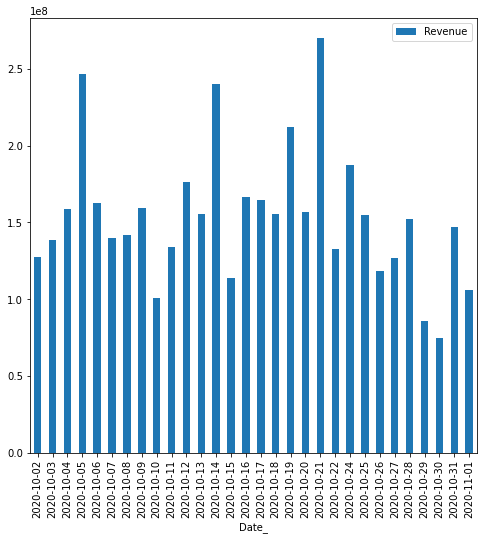

In [193]:
print('Total Revenue from ticket Sales for 1 month')
df = df.iloc[:30]
df['Revenue']=df['Revenue'].astype(int)
df[['Revenue','Date_']].plot.bar(x = 'Date_',y = 'Revenue',figsize=(8,8))

(4) Most popular Movies as per number 5 star reviews:

In [171]:


#some stats that the admin can view
from pandas import DataFrame
print("most popular Movies as per number 5 star reviews:")
query = "select m.title, count(rate_star) as Number_of_5_star_reviews from rating as r, movie as m where m.Movie_id=r.Movie_id and r.rate_star=5 group by m.title order by Number_of_5_star_reviews desc limit 10;"
with conn.cursor() as cursor:
    cursor.execute(query)
    df = DataFrame(cursor.fetchall())
    df.columns = cursor.column_names
    display(df)


most popular Movies as per number 5 star reviews:


,title,Number_of_5_star_reviews
0,Confessions of a Time Traveler - The Man from ...,40
1,El Camino: A Breaking Bad Movie,40
2,A Score to Settle,39
3,No Ordinary Man,37
4,A Beautiful Day in the Neighborhood,35
5,De patitas a la calle,33
6,Patients of a Saint,30
7,Blind,27
8,A Quiet Place Part II,26
9,All Day and a Night,25
